# Tests

## Basic tests

### Utilisation of classes

In [2]:
from class_Path import *
file_path = "./ged docs/Queen_Eliz_II.ged"

In [3]:
graph = Graph(file_path)
path = Path(file_path)

In [8]:
gedcom_parser = Parser()
gedcom_parser.parse_file(file_path)
root_child_elements = gedcom_parser.get_root_child_elements()

def find_IndividualElement(first_name,last_name):
    """
    Get Individual element of ged with first names and last name

    Parameters
    ---
    first_names : str
        complete first names of the individual
    last_name : str
        last names of the individual 

    Returns 
    ---
    bool 
        Tells if the individual was found
    IndividualElement
        IndividualElement corresponding to the individual in the ged

    """
    for element in root_child_elements:
        if isinstance(element, IndividualElement):
            if element.surname_match(last_name) and element.given_name_match(first_name):
                return (True, element)
    return [False, element]

In [9]:
ind1bis = find_IndividualElement("Edward VII","Wettin")[1].get_pointer()
ind2bis = find_IndividualElement("John William of Orange", "Friso")[1].get_pointer()

In [11]:
print(path.shortest_path(ind1bis,ind2bis))

(11, [['@I3141@', 'grandparent'], ['@I3320@', 'grandparent'], ['@I3321@', 'sibling'], ['@I3615@', 'spouse'], ['@I3613@', 'parent']])


In [10]:
path.get(ind1bis,ind2bis)

[11,
 'John William of Orange is the father of the husband of the sister of the grand father of the grand father of Edward VII.']

## Parameters tests

In [1]:
from class_Test import *

### Queen_Eliz_II.ged

In [2]:
# /!\ Long : takes about 2 minutes /!\
test = Test("./ged docs/Queen_Eliz_II.ged")

In [3]:
test.comparison_Dataframe()

,Path,Distance,Dijkstar distance,Execution time (s),Dijkstar execution time (s),Difference of execution time (s)
Individuals,,,,,,
"[@I10183@, @I6451@]",Bethoc Beatrix MacKenneth Heiress of Scone Pri...,2,2,3.839785,3.776983,0.062802
"[@I10534@, @I5636@]",Philip (Sir) de BRAOSE (BRIOUZE) is the son of...,5,5,4.769518,5.275891,-0.506373
"[@I2208@, @I10321@]",Agnes is the grand son of the grand daughter o...,6,6,5.399910,5.228283,0.171627
"[@I376@, @I6572@]",Henry (of Roslin) ST. CLAIR (SINCLAIR) is the ...,8,8,7.691059,7.916301,-0.225242
"[@I1826@, @I11242@]",Elizabeth is the daughter of the grand daughte...,15,15,13.141579,13.387363,-0.245784


In [4]:
test.average()

(6.968370199203491, 7.1169641494750975)

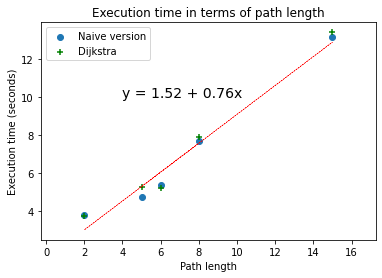

In [5]:
test.plot_Distance_Time()

In 40.0% of cases, the Dijkstra algorithm is faster.


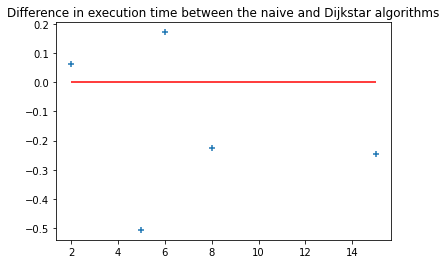

In [6]:
test.plot_difference()

## Validation 

In [1]:
from gedcom.element.individual import IndividualElement
from gedcom.parser import Parser
from class_Path import *

gedcom_parser = Parser()

file_path = './ged docs/Queen_Eliz_II.ged'
path = Path(file_path)
gedcom_parser = Parser()
gedcom_parser.parse_file(file_path)
root_child_elements = gedcom_parser.get_root_child_elements()

def find_IndividualElement(first_name,last_name):
    """
    Get Individual element of ged with first names and last name

    Parameters
    ---
    first_names : str
        complete first names of the individual
    last_name : str
        last names of the individual 

    Returns 
    ---
    bool 
        Tells if the individual was found
    IndividualElement
        IndividualElement corresponding to the individual in the ged

    """
    for element in root_child_elements:
        if isinstance(element, IndividualElement):
            if element.surname_match(last_name) and element.given_name_match(first_name):
                return (True, element)
    return [False, element]


path = Path(file_path)

ind1 = find_IndividualElement("Elizabeth II Alexandra Mary","Windsor")[1].get_pointer()
ind2 = find_IndividualElement("George V", "Windsor")[1].get_pointer()

#print(path.shortest_path(ind1,ind2))
#path.get(ind1,ind2)

ind1bis = find_IndividualElement("Edward VII","Wettin")[1].get_pointer()
ind2bis = find_IndividualElement("John William of Orange", "Friso")[1].get_pointer()

print(path.shortest_path(ind1bis,ind2bis))
path.get(ind1bis,ind2bis)[1]

(11, [['@I3141@', 'grandparent'], ['@I3138@', 'parent'], ['@I3321@', 'uncle'], ['@I3615@', 'spouse'], ['@I3613@', 'parent']])


[11,
 'John William of Orange is the father of the husband of the aunt of the father of the grand father of Edward VII.']